In [2]:
import numpy as np
import pandas as pd 

training_data = pd.read_csv('train.csv')
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


here the label is the 0th column and then we have the other pixels. 

In [154]:

data = training_data

data = np.array(data)
m, n = data.shape

data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

print(X_train.shape)
print(Y_train.shape)



(784, 42000)
(42000,)


In [172]:
def initiate(X_train,q,r,s):
    A_0 = X_train
    # q = 55
    # r = 10
    # s = 10
    W_1 = np.random.rand(q,784) - 0.5
    b_1 = np.random.rand(q,1) - 0.5
    W_2 = np.random.rand(r,q)- 0.5
    b_2 = np.random.rand(r,1)- 0.5
    W_3 = np.random.rand(s,r)- 0.5
    b_3 = np.random.rand(s,1)- 0.5
    weights = [0, W_1, W_2, W_3]
    bias = [0, b_1,b_2, b_3]
    return A_0, weights, bias

In [156]:
def relu(x):
    return np.maximum(x,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
# def softmax(Z):
#     Z -= np.max(Z, axis=0)  # Axis 0 if your batches are in columns
#     exp_scores = np.exp(Z)
#     return exp_scores / np.sum(exp_scores, axis=0)


what we can do is define front propogation, and define back propogation. then final will update for x number of iterations 

In [157]:

def front_propogation(A, Z, weights, bias):
    Z[1] = np.dot(weights[1],A[0]) + bias[1]
    A[1] = relu(Z[1])

    Z[2] = np.dot(weights[2],A[1]) + bias[2]
    A[2] = relu(Z[2])

    Z[3] = np.dot(weights[3],A[2]) + bias[3]
    A[3] = softmax(Z[3])

    return weights, bias, A, Z

In [159]:
def der_relu(x):
    return x>0
def one_hot(Y):
    oY = np.zeros((Y.size, Y.max() + 1))
    oY[np.arange(Y.size), Y] = 1
    oY = oY.T
    return oY

In [160]:
def back_propogation(weights, bias, A, Z, Y,m, alpha):
    Y_train = one_hot(Y)
    dz_3 = A[3] - Y_train
    # print("initial loss ", dz_3)
    dw_3 = 1/m* (np.dot(dz_3,np.transpose(A[2])))
    db_3 = 1/m* np.sum(dz_3, axis=1, keepdims=True)

    da_2 = np.dot(np.transpose(weights[3]),dz_3)
    dz_2 = da_2 * der_relu(Z[2])
    dw_2 = 1/m*(np.dot(dz_2,np.transpose(A[1])))
    db_2 = 1/m*np.sum(dz_2)

    da_1 = np.dot(np.transpose(weights[2]),dz_2)
    dz_1 = da_1*der_relu(Z[1])
    dw_1 = 1/m*(np.dot(dz_1,np.transpose(A[0])))
    db_1 = 1/m*np.sum(dz_1)

    weights[1] = weights[1] - alpha*dw_1
    bias[1] = bias[1] - alpha*db_1
    weights[2] = weights[2] - alpha*dw_2
    bias[2] = bias[2] - alpha*db_2
    weights[3] = weights[3] - alpha*dw_3
    bias[3] = bias[3] - alpha*db_3
    return weights, bias, A, Z

In [161]:
def get_predictions(A_3):
    return np.argmax(A_3,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size




In [177]:
def neural_network(X_train, Y_train, alpha, iterations, q , r , s):
    print(X_train.shape)
    n,m = X_train.shape
    A_0, weights, bias = initiate(X_train, q , r ,s)
    A = [A_0, 0, 0, 0]
    Z = [0, 0, 0, 0]

    for i in range(iterations):
        weights, bias, A, Z = front_propogation(A, Z, weights, bias)
        weights, bias, A, Z = back_propogation(weights, bias, A, Z, Y_train, m, alpha)

        if i % 10 == 0:
            print("iteration: ", i)
            predictions = get_predictions(A[3])
            print(get_accuracy(predictions, Y_train))
            if i == 0:
                for j in range(4):
                    print(f"Layer {j}:")
                    if not isinstance(A[j], int):
                        print(f"  A[{j}].shape: {A[j].shape}")
                    if not isinstance(Z[j], int):
                        print(f"  Z[{j}].shape: {Z[j].shape}")
                    if not isinstance(weights[j], int):
                        print(f"  weights[{j}].shape: {weights[j].shape}")
                    if not isinstance(bias[j], int):
                        print(f"  bias[{j}].shape: {bias[j].shape}")
    return weights, bias


In [178]:
alpha = 0.1
iterations  = 500
q = 55
r = 10
s = 10
weights, bias = neural_network(X_train, Y_train, alpha, iterations,q,r,s)

(784, 42000)
iteration:  0
[3 3 5 ... 4 5 5] [1 0 1 ... 7 6 9]
0.1133095238095238
Layer 0:
  A[0].shape: (784, 42000)
Layer 1:
  A[1].shape: (55, 42000)
  Z[1].shape: (55, 42000)
  weights[1].shape: (55, 784)
  bias[1].shape: (55, 1)
Layer 2:
  A[2].shape: (10, 42000)
  Z[2].shape: (10, 42000)
  weights[2].shape: (10, 55)
  bias[2].shape: (10, 1)
Layer 3:
  A[3].shape: (10, 42000)
  Z[3].shape: (10, 42000)
  weights[3].shape: (10, 10)
  bias[3].shape: (10, 1)
iteration:  10
[9 0 7 ... 9 7 9] [1 0 1 ... 7 6 9]
0.15676190476190477
iteration:  20
[9 0 1 ... 1 1 9] [1 0 1 ... 7 6 9]
0.24516666666666667
iteration:  30
[7 0 1 ... 1 1 9] [1 0 1 ... 7 6 9]
0.28883333333333333
iteration:  40
[7 0 1 ... 7 9 9] [1 0 1 ... 7 6 9]
0.3461190476190476
iteration:  50
[7 0 1 ... 7 9 9] [1 0 1 ... 7 6 9]
0.3899285714285714
iteration:  60
[1 0 1 ... 7 7 9] [1 0 1 ... 7 6 9]
0.42533333333333334
iteration:  70
[1 0 1 ... 7 7 9] [1 0 1 ... 7 6 9]
0.45121428571428573
iteration:  80
[1 0 1 ... 7 6 9] [1 0 1 .

Testing 

In [211]:
def test_predictions(weights, bias, X):
    A = [X, 0, 0, 0]
    Z = [0, 0, 0, 0]
    _, _, A, _ = front_propogation(A,Z,weights,bias)
    predictions = get_predictions(A[3])
    return predictions

    

In [179]:
testing = pd.read_csv("test.csv")
testing.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Predictions:  [6]


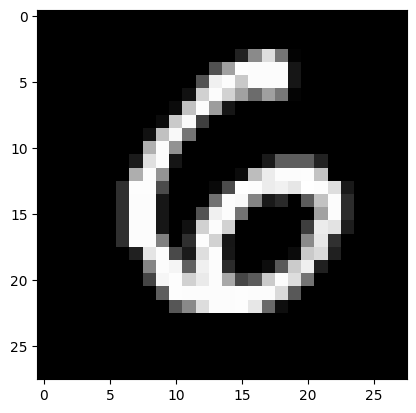

In [230]:
from matplotlib import pyplot as plt
test = np.array(testing)
num_images = test.shape[0]

#running this for a random index
index = np.random.randint(0, num_images)
current_image = test[index]
input_image = current_image / 255.
input_image = input_image.reshape(-1, 1) 
# print(input_image)
predictions = test_predictions(weights, bias, input_image)
print("Predictions: ", predictions)
current_image = current_image.reshape((28, 28))

plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()


currently the testing data doesnt have labels, so we cant find the accuracy until we create a validation dataset from the initial testing data. in our sample submission we must give a label for each and every index, and we can compare it. Now we dont have a final answer key. so we can take any of the kaggle answer keys which has high accuracy in testing data and compare. 

In [213]:

predictions_list = []

for i in range(num_images):
    current_image = test[i]
    input_image = current_image / 255.
    input_image = input_image.reshape(-1, 1)
    prediction = test_predictions(weights, bias, input_image)
    prediction = prediction[0] #to remove the array part or the list brackets 
    predictions_list.append([i + 1, prediction])
submission_df = pd.DataFrame(predictions_list, columns=["ImageId", "Label"])


submission_df.to_csv('submission.csv', index=False)


now lets try to import an already existing submission with high accuracy and check our testing accuracy

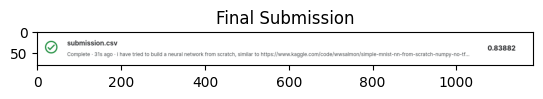

In [217]:
from matplotlib import image as img
plt.title("Final Submission") 
image = img.imread("final_submission.png")
plt.imshow(image)
plt.show()